In [26]:
# Samsung INR18650-25S
# cell definition
cell_U_max = 4.2 # [V]
cell_U_nom = 3.6 # [V]
cell_Id_max = 25 # [A] maximum discharge current without cooling
cell_C = 2400 # [mAh] rated Capacity
cell_E = cell_C*1e-3 * cell_U_nom * 3600 # [Ws]
print('cell_E',f'{cell_E:0.0f}','Ws')

# number of cells in Series
S = 14

# pack definition
pack_E = S * cell_E
pack_U_max = S * cell_U_max
print('pack_E',f'{pack_E:0.0f}','Ws')

# number of packs in Parallel
Pa = 2 * 3 # 2 in parallel in small pack, 3 packs in parallel

# assembly
assembly_E = Pa * pack_E
print('assembly_E',f'{assembly_E:0.0f}','Ws')

cell_E 31104 Ws
pack_E 435456 Ws
assembly_E 2612736 Ws


In [27]:
t_flight = 120 # [s]
P_used = 5000 # [W]
E_used = t_flight * P_used
print('E_used',f'{assembly_E:0.0f}','Ws')

E_used 2612736 Ws


In [28]:
E_left = assembly_E - E_used
fraction = E_left / assembly_E
print('E_left',f'{E_left:0.0f}','Ws')
print('% left',f'{fraction*100:0.2f}','%')

E_left 2012736 Ws
% left 77.04 %


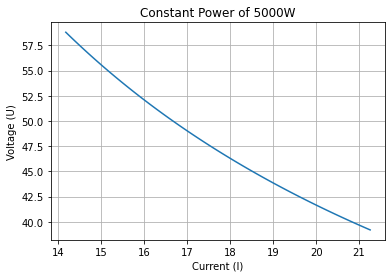

In [29]:
import numpy as np
import matplotlib.pyplot as plt
# voltage at a certain charge state

# depending on discharge current drawn with power demand
# changes over time!

def compute_I(U,P):
    I = P / U
    return I

U_values = np.linspace(2.8,4.2,100) # voltage range
I_values = compute_I(U_values*S, P_used) / Pa

plt.plot(I_values,U_values*S)
plt.title(f'Constant Power of {P_used}W')
plt.ylabel('Voltage (U)')
plt.xlabel('Current (I)')
plt.grid(True)
plt.show()

In [30]:
# Wh Energy wit 15 A discharge
E_d_full = 7.956723338485316 # [] at 2.7972055888223553  Volts
E_d_left = E_d_full - (fraction * E_d_full)
E_d_left

1.8272163751298214

In [31]:
# read voltage value on curve at E_d_left Wh
# 1.8268933539412673, 3.705389221556886
U_d_left = 3.705389221556886 # [V]
assembly_U_d_left = U_d_left * S
assembly_U_d_left

51.875449101796406

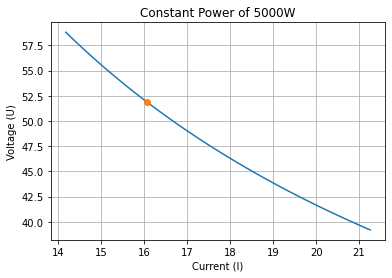

In [32]:
import numpy as np
import matplotlib.pyplot as plt
# voltage at a certain charge state

# depending on discharge current drawn with power demand
# changes over time!

max_I_d_left = compute_I(assembly_U_d_left,P_used) / Pa

plt.scatter(max_I_d_left,assembly_U_d_left,c='tab:orange',zorder=10)
plt.plot(I_values,U_values*S)
plt.title(f'Constant Power of {P_used}W')
plt.ylabel('Voltage (U)')
plt.xlabel('Current (I)')
plt.grid(True)
plt.show()

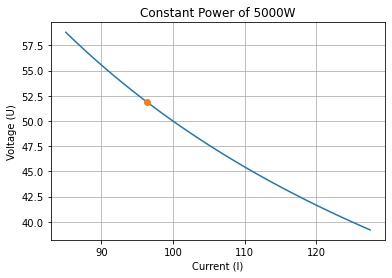

In [139]:
import numpy as np
import matplotlib.pyplot as plt
# voltage at a certain charge state

# depending on discharge current drawn with power demand
# changes over time!

max_I_d_left = compute_I(assembly_U_d_left,P_used) 

plt.scatter(max_I_d_left,assembly_U_d_left,c='tab:orange',zorder=10)
plt.plot(I_values*Pa,U_values*S)
plt.title(f'Constant Power of {P_used}W')
plt.ylabel('Voltage (U)')
plt.xlabel('Current (I)')
plt.grid(True)
plt.show()

# computation with discharge curves

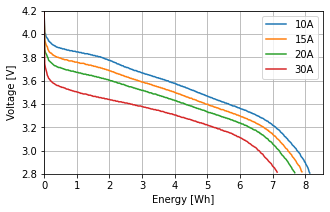

In [96]:
#https://lygte-info.dk/review/batteries2012/Samsung%20INR18650-25S%202500mAh%20%28Purple%29%20UK.html
import matplotlib.pyplot as plt
import numpy as np

# Function to read data from a file
def read_data(filename):
    data = np.loadtxt(filename, delimiter=',')
    x = data[:, 0]
    y = data[:, 1]
    return x, y

# Read data from each file
x_10A, y_10A = read_data("data/INR_10A.txt")
x_15A, y_15A = read_data("data/INR_15A.txt")
x_20A, y_20A = read_data("data/INR_20A.txt")
x_30A, y_30A = read_data("data/INR_30A.txt")

# Plot the data
plt.figure(figsize=(5, 3))
plt.plot(x_10A, y_10A, label='10A')
plt.plot(x_15A, y_15A, label='15A')
plt.plot(x_20A, y_20A, label='20A')
plt.plot(x_30A, y_30A, label='30A')

# Add labels and title
plt.xlabel('Energy [Wh]')
plt.ylabel('Voltage [V]')
#plt.title('Samsung INR18650-25S cell discharge curve')
plt.legend()
plt.xlim(0,None)
plt.ylim(2.8,4.2)

# Show the plot
plt.grid(True)
plt.savefig(f'./Grafiken Report/INR_cell_discharge.pdf',dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

In [129]:
# compute energy demand of flight time
E_req = E_used / 3600 # [Wh]

In [132]:
# compute U_min from fit points
U_min_15A = fitted_function(E_req, popt_15A)
U_min_20A = fitted_function(E_req, popt_20A)
U_min = np.mean([U_min_15A,U_min_20A])
U_min

50.95368353113729

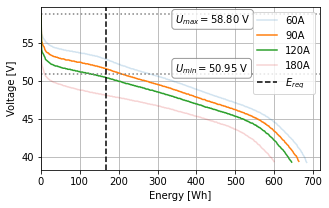

In [140]:
#apply series and parallel
# Read data from each file
x_10A_pack, y_10A_pack = (x_10A * Pa * S, y_10A * S) 
x_15A_pack, y_15A_pack = (x_15A * Pa * S, y_15A * S)
x_20A_pack, y_20A_pack = (x_20A * Pa * S, y_20A * S)
x_30A_pack, y_30A_pack = (x_30A * Pa * S, y_30A * S)

U_max = max(y_10A_pack)

# Plot the data
plt.figure(figsize=(5, 3))
plt.plot(x_10A_pack, y_10A_pack, label=f'{10*Pa}A', alpha = 0.2)
plt.plot(x_15A_pack, y_15A_pack, label=f'{15*Pa}A', alpha = 1)
plt.plot(x_20A_pack, y_20A_pack, label=f'{20*Pa}A', alpha = 1)
plt.plot(x_30A_pack, y_30A_pack, label=f'{30*Pa}A', alpha = 0.2)

plt.axhline(y=U_max, color='gray', linestyle=':')
plt.axhline(y=U_min, color='gray', linestyle=':')
#plt.axhline(y=48, color='gray', linestyle='--')
plt.axvline(x=E_req, color='black', linestyle='--', label='$E_{req}$')

bbox_props = dict(boxstyle="round,pad=0.3", edgecolor='gray', facecolor='white', alpha=0.8)
plt.text(0.48, 0.88, f'$U_{{max}}={U_max:0.2f}$ V', fontsize=10, ha='left', va='bottom', transform=plt.gca().transAxes, bbox=bbox_props)
plt.text(0.48, 0.58, f'$U_{{min}}={U_min:0.2f}$ V', fontsize=10, ha='left', va='bottom', transform=plt.gca().transAxes, bbox=bbox_props)


# Add labels and title
plt.xlabel('Energy [Wh]')
plt.ylabel('Voltage [V]')
#plt.title('Samsung INR18650-25S cell discharge curve')
plt.legend()
plt.xlim(0,None)
#plt.ylim(2.8,4.2)



# Show the plot
plt.grid(True)
plt.savefig(f'./Grafiken Report/battery_discharge.pdf',dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

In [100]:
# compute current from voltage

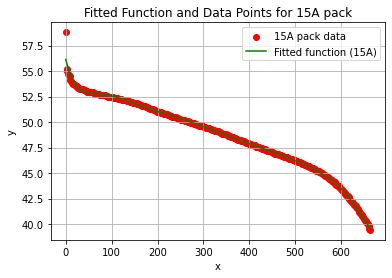

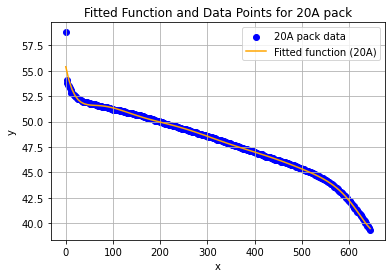

In [120]:
import numpy as np
from scipy.optimize import curve_fit

# Define the polynomial function with a higher degree (degree 10)
def high_degree_polynomial_function(x, *params):
    return sum(param * x**i for i, param in enumerate(params))

# Define initial guess for parameters
initial_guess = np.ones(11)

# Fit the high-degree polynomial function to the 15A pack data
popt_15A, pcov_15A = curve_fit(high_degree_polynomial_function, x_15A_pack, y_15A_pack, p0=initial_guess)

# Fit the high-degree polynomial function to the 20A pack data
popt_20A, pcov_20A = curve_fit(high_degree_polynomial_function, x_20A_pack, y_20A_pack, p0=initial_guess)

# Define the function for obtaining y for any value of x
def fitted_function(x, popt):
    return high_degree_polynomial_function(x, *popt)

# Plot the original data points for 15A pack
plt.scatter(x_15A_pack, y_15A_pack, color='red', label='15A pack data')

# Plot the fitted function for 15A pack
x_values_15A = np.linspace(min(x_15A_pack), max(x_15A_pack), 100)
plt.plot(x_values_15A, fitted_function(x_values_15A, popt_15A), color='green', label='Fitted function (15A)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitted Function and Data Points for 15A pack')
plt.legend()
plt.grid(True)
plt.show()

# Plot the original data points for 20A pack
plt.scatter(x_20A_pack, y_20A_pack, color='blue', label='20A pack data')

# Plot the fitted function for 20A pack
x_values_20A = np.linspace(min(x_20A_pack), max(x_20A_pack), 100)
plt.plot(x_values_20A, fitted_function(x_values_20A, popt_20A), color='orange', label='Fitted function (20A)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitted Function and Data Points for 20A pack')
plt.legend()
plt.grid(True)
plt.show()

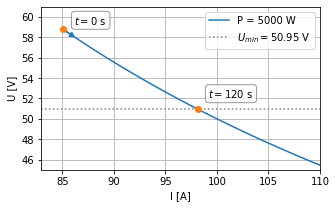

In [228]:
import numpy as np
import matplotlib.pyplot as plt
# voltage at a certain charge state

# depending on discharge current drawn with power demand
# changes over time!
plt.figure(figsize=(5, 3))
plt.text(0.12, 0.88, f'$t={0:0.0f}$ s', fontsize=10, ha='left', va='bottom', transform=plt.gca().transAxes, bbox=bbox_props)
plt.text(0.60, 0.43, f'$t={t_flight:0.0f}$ s', fontsize=10, ha='left', va='bottom', transform=plt.gca().transAxes, bbox=bbox_props)

plt.plot(I_values*Pa,U_values*S,label=f'P = 5000 W')
plt.scatter(compute_I(U_max,P_used) ,U_max,c='tab:orange',zorder=10)
plt.scatter(compute_I(U_min,P_used) ,U_min,c='tab:orange',zorder=10)
plt.axhline(y=U_min, color='gray', linestyle=':',label=f'$U_{{min}}={U_min:0.2f}$ V')

plt.arrow(compute_I(U_max,P_used) ,U_max, 1.45/2,-1/2,
          head_width=0.5, head_length=0.5, fc='tab:blue', ec='tab:blue')

plt.ylabel('U [V]')
plt.xlabel('I [A]')
plt.legend()
plt.ylim(45,61)
plt.xlim(None,110)
plt.grid(True)
plt.savefig(f'./Grafiken Report/battery_voltage.pdf',dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

In [229]:
print(compute_I(U_max,P_used))
print(compute_I(U_min,P_used))

85.03401360544217
98.12833250700217


In [231]:
# no losses stored energy 
E_cell_theo = 9 # [Wh]
E_pack_theo = E_cell_theo * S * Pa
E_pack_theo

756

In [233]:
E_req

166.66666666666666

In [235]:
E_cell_17_5A = 7.826732673267326 # [Wh]
E_pack_17_5A = E_cell_17_5A * S * Pa
E_pack_17_5A

657.4455445544554

In [237]:
E_waste = E_pack_theo - E_pack_17_5A
E_waste

98.55445544554459

In [239]:
E_left_w_waste = E_pack_theo - E_req - E_waste
E_left_w_waste

490.7788778877888